# Energy consumption project

The purpose of this project is to play around with the data. I use Jupyter Lab, conda environment and python with numpy, pandas and matplotlib.

Let's see whether we find something interesting. Please, don't treat this research as an official, formal, "consulting-style" document. It was done for fun.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# Customise

year_to_get = "2017"
limit_for_individuals = 0.02
focus_countries=[["DE", "Germany", "#cccc00"], ["FR", "France", "#0000e6"], ["UK", "United Kingdom", "#ff4d4d"], ["IT", "Italy", "#00e600"]]

Source of data: [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/t2020_34/default/table?lang=en)

**Final energy consumption**

By "Final Energy Consumption" is meant all energy supplied to industry, transport, households, services and agriculture (it excludes deliveries to the energy transformation sector and the energy industries themselves). This quantity is relevant for measuring the energy consumption at final place of energy use and for comparing it to the Europe 2020 targets. The "Percentage of savings" is calculated using these values of 2005 and its forecast for 2020 targets in Directive 2012/27/EU; the Europe 2020 target is reached when this value reaches the level of 20%.

The data will be presented in MTOE (millions of tonnes of oil equivalent).

<sub>
<sup>
<b>Country codes</b>


<u>EU Members:</u>

<i>Austria (AT) Belgium (BE) Bulgaria (BG) Croatia (HR) Cyprus (CY) Czechia (CZ) Denmark (DK) Estonia (EE) Finland (FI) France (FR) Germany (DE) Greece (EL) Hungary (HU) Ireland (IE) Italy (IT) Latvia (LV) Lithuania (LT) Luxembourg (LU) Malta (MT) Netherlands (NL) Poland (PL) Portugal (PT) Romania (RO) Slovakia (SK) Slovenia (SI) Spain (ES) Sweden (SE)</i>

<u>United Kingdom:</u>

<i>United Kingdom (UK)</i>

<u>EFTA:</u>

<i>Iceland (IS) Liechtenstein (LI) Norway (NO) Switzerland (CH)</i>

<u>EU Candidates:</u>

<i>Albania (AL) Montenegro (ME) North Macedonia (MK) Serbia (RS) Turkey (TR)</i>

<u>Potential Candidates:</u>

<i>Bosnia and Herzegovina (BA) Kosovo (XK)</i>
    
<u>Other countries</u>
    
<i>Algeria (DZ) Armenia (AM) Azerbaijan (AZ) Belarus (BY) Egypt (EG) Georgia (GE) Israel (IL) Jordan (JO) Lebanon (LB) Libya (LY) Moldova (MD) Morocco (MA) Palestine (PS) Russia (RU) Syria (SY) Tunisia (TN) Ukraine (UA)</i>
</sup>
</sub>

In [3]:
df = pd.read_csv('energy_consumption.tsv', sep='\t')

In [4]:
# Cleaning the data

df.rename(columns = {list(df)[0]: "Country"}, inplace=True)
df = df[df.Country.str.contains('MTOE')]
df['Country'] = df['Country'].map(lambda location: location.rsplit(",").pop())
df.rename(columns=lambda name: name.replace(' ', ''), inplace=True)
df = df.set_index(df.Country)
df.drop(df.columns[[0]], axis=1, inplace=True)
df.replace({": ": np.nan}, inplace=True)
df = df.transpose()
df = df[:-1]
df.drop(['EA19', 'EU28', 'EU27_2007' ,'EU27_2020'], axis=1, inplace=True)
df

Country,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EE,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
1990,1.93,19.34,NaN,31.72,16.19,1.10,32.60,229.54,13.46,5.45,...,59.79,11.93,44.28,11.74,31.15,3.73,15.20,39.11,136.37,NaN
1991,1.42,20.84,NaN,33.26,12.26,1.29,29.18,227.77,14.22,5.15,...,60.16,12.39,35.66,9.74,31.47,3.71,12.96,39.58,141.55,NaN
1992,1.02,20.26,NaN,33.22,10.93,1.32,28.92,221.17,14.03,3.42,...,58.97,12.84,27.04,7.97,33.23,3.40,12.24,40.72,139.48,NaN
1993,0.94,20.66,NaN,32.74,10.77,1.31,28.12,222.31,14.50,2.93,...,63.43,12.97,25.15,6.60,33.69,3.68,11.20,43.44,142.14,NaN
1994,0.94,20.33,NaN,33.73,10.84,1.35,26.53,218.28,14.52,2.84,...,61.40,13.55,25.67,6.29,34.28,3.86,10.94,41.62,142.41,NaN
1995,0.95,21.38,NaN,34.42,11.44,1.43,26.22,221.60,14.82,2.55,...,62.83,13.89,26.82,6.05,35.05,4.08,10.98,45.80,142.38,NaN
1996,1.03,23.03,NaN,36.65,11.58,1.48,26.62,231.11,15.43,2.98,...,66.37,14.69,29.69,8.72,36.01,4.48,11.35,49.88,150.38,NaN
1997,0.83,22.65,NaN,36.24,10.70,1.48,26.37,227.10,15.08,2.91,...,65.05,15.29,28.75,9.56,35.30,4.55,11.29,51.46,147.48,NaN
1998,0.92,23.29,NaN,37.18,10.31,1.55,25.37,225.88,15.05,2.67,...,59.86,16.31,26.24,9.33,35.62,4.37,11.01,50.88,148.88,NaN
1999,1.52,23.50,NaN,37.12,9.15,1.59,24.22,221.87,15.01,2.43,...,58.31,16.99,22.54,6.97,35.19,4.42,10.92,50.18,151.88,NaN


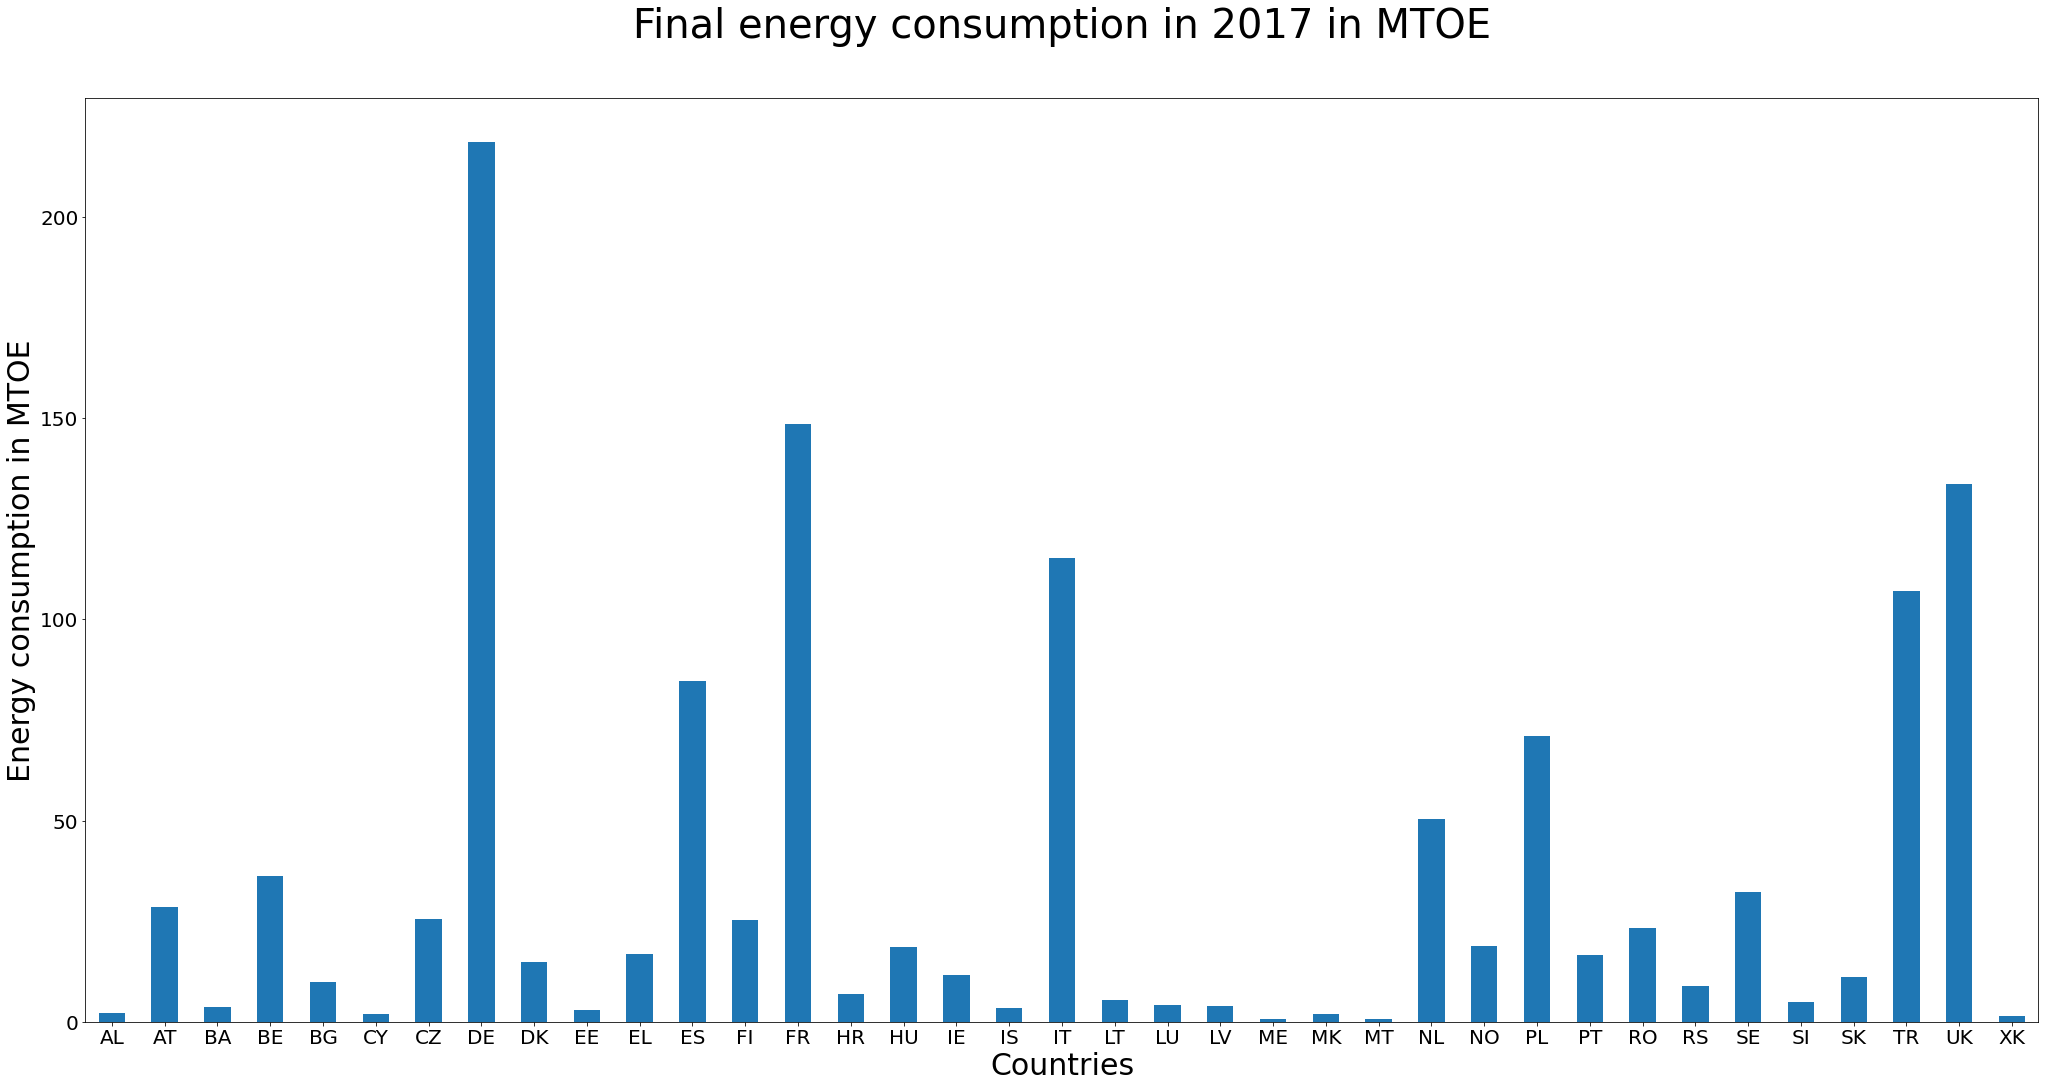

In [5]:
fig, axes = plt.subplots()
df_float = df.astype(float)
df_float.loc[year_to_get].plot(rot=0, kind='bar', figsize=(35,17), fontsize=20, ax=axes)
axes.set_title('Final energy consumption in {} in MTOE'.format(year_to_get), pad=60)
axes.title.set_size(40)
axes.set_xlabel("Countries", fontsize=30)
axes.set_ylabel("Energy consumption in MTOE", fontsize=30)
plt.show()
plt.close()

In the chart above it is clearly visible that, of course, the bigger the population of the country the higher the energy consumption. Below you can find pie chart with the shares of the total energy consumption of the group.

You can select the countries you want to investigate by changing the variables in the top of the document. I chose Germany, France, Italy and United Kingdom.

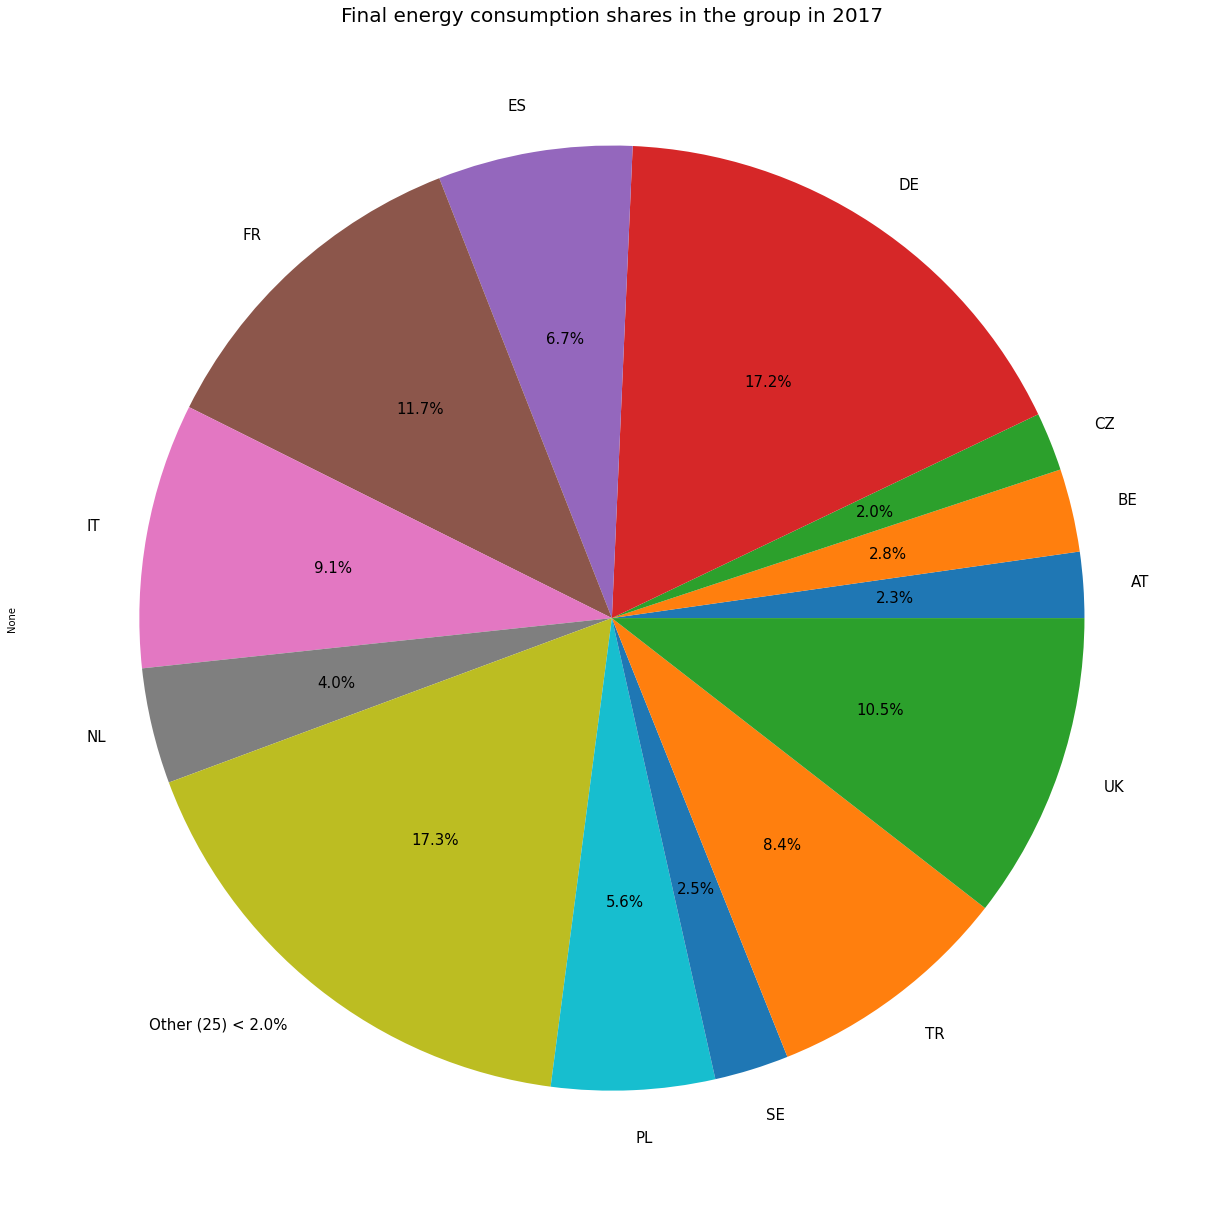

In [6]:
plt.rcParams['text.color'] = 'black'
fig, axes = plt.subplots()
df_float2 = df.astype(float).loc[year_to_get]
econs_group_separate = df_float2[df_float2/df_float2.sum() >= limit_for_individuals]
econs_group_combined = df_float2[df_float2/df_float2.sum() < limit_for_individuals]
econs_group_list = econs_group_combined.index.values
econs_group_list_size = len(econs_group_combined.index.values)
econs_group_list_string = ', '.join([item for item in econs_group_list])
econs_record_combined = pd.Series(econs_group_combined.sum(), index=["Other ({}) < {}%".format(econs_group_list_size, limit_for_individuals * 100)])
econs_pie_chart_data = econs_group_separate.append(econs_record_combined).sort_index()
econs_pie_chart_data
pie_chart = econs_pie_chart_data.plot(kind='pie', figsize=(35,17), autopct=lambda p:f'{p:.1f}%', fontsize=15, ax = axes)
plt.title("Final energy consumption shares in the group in {}".format(year_to_get), fontsize=20)
plt.tight_layout()
plt.show()
plt.close()

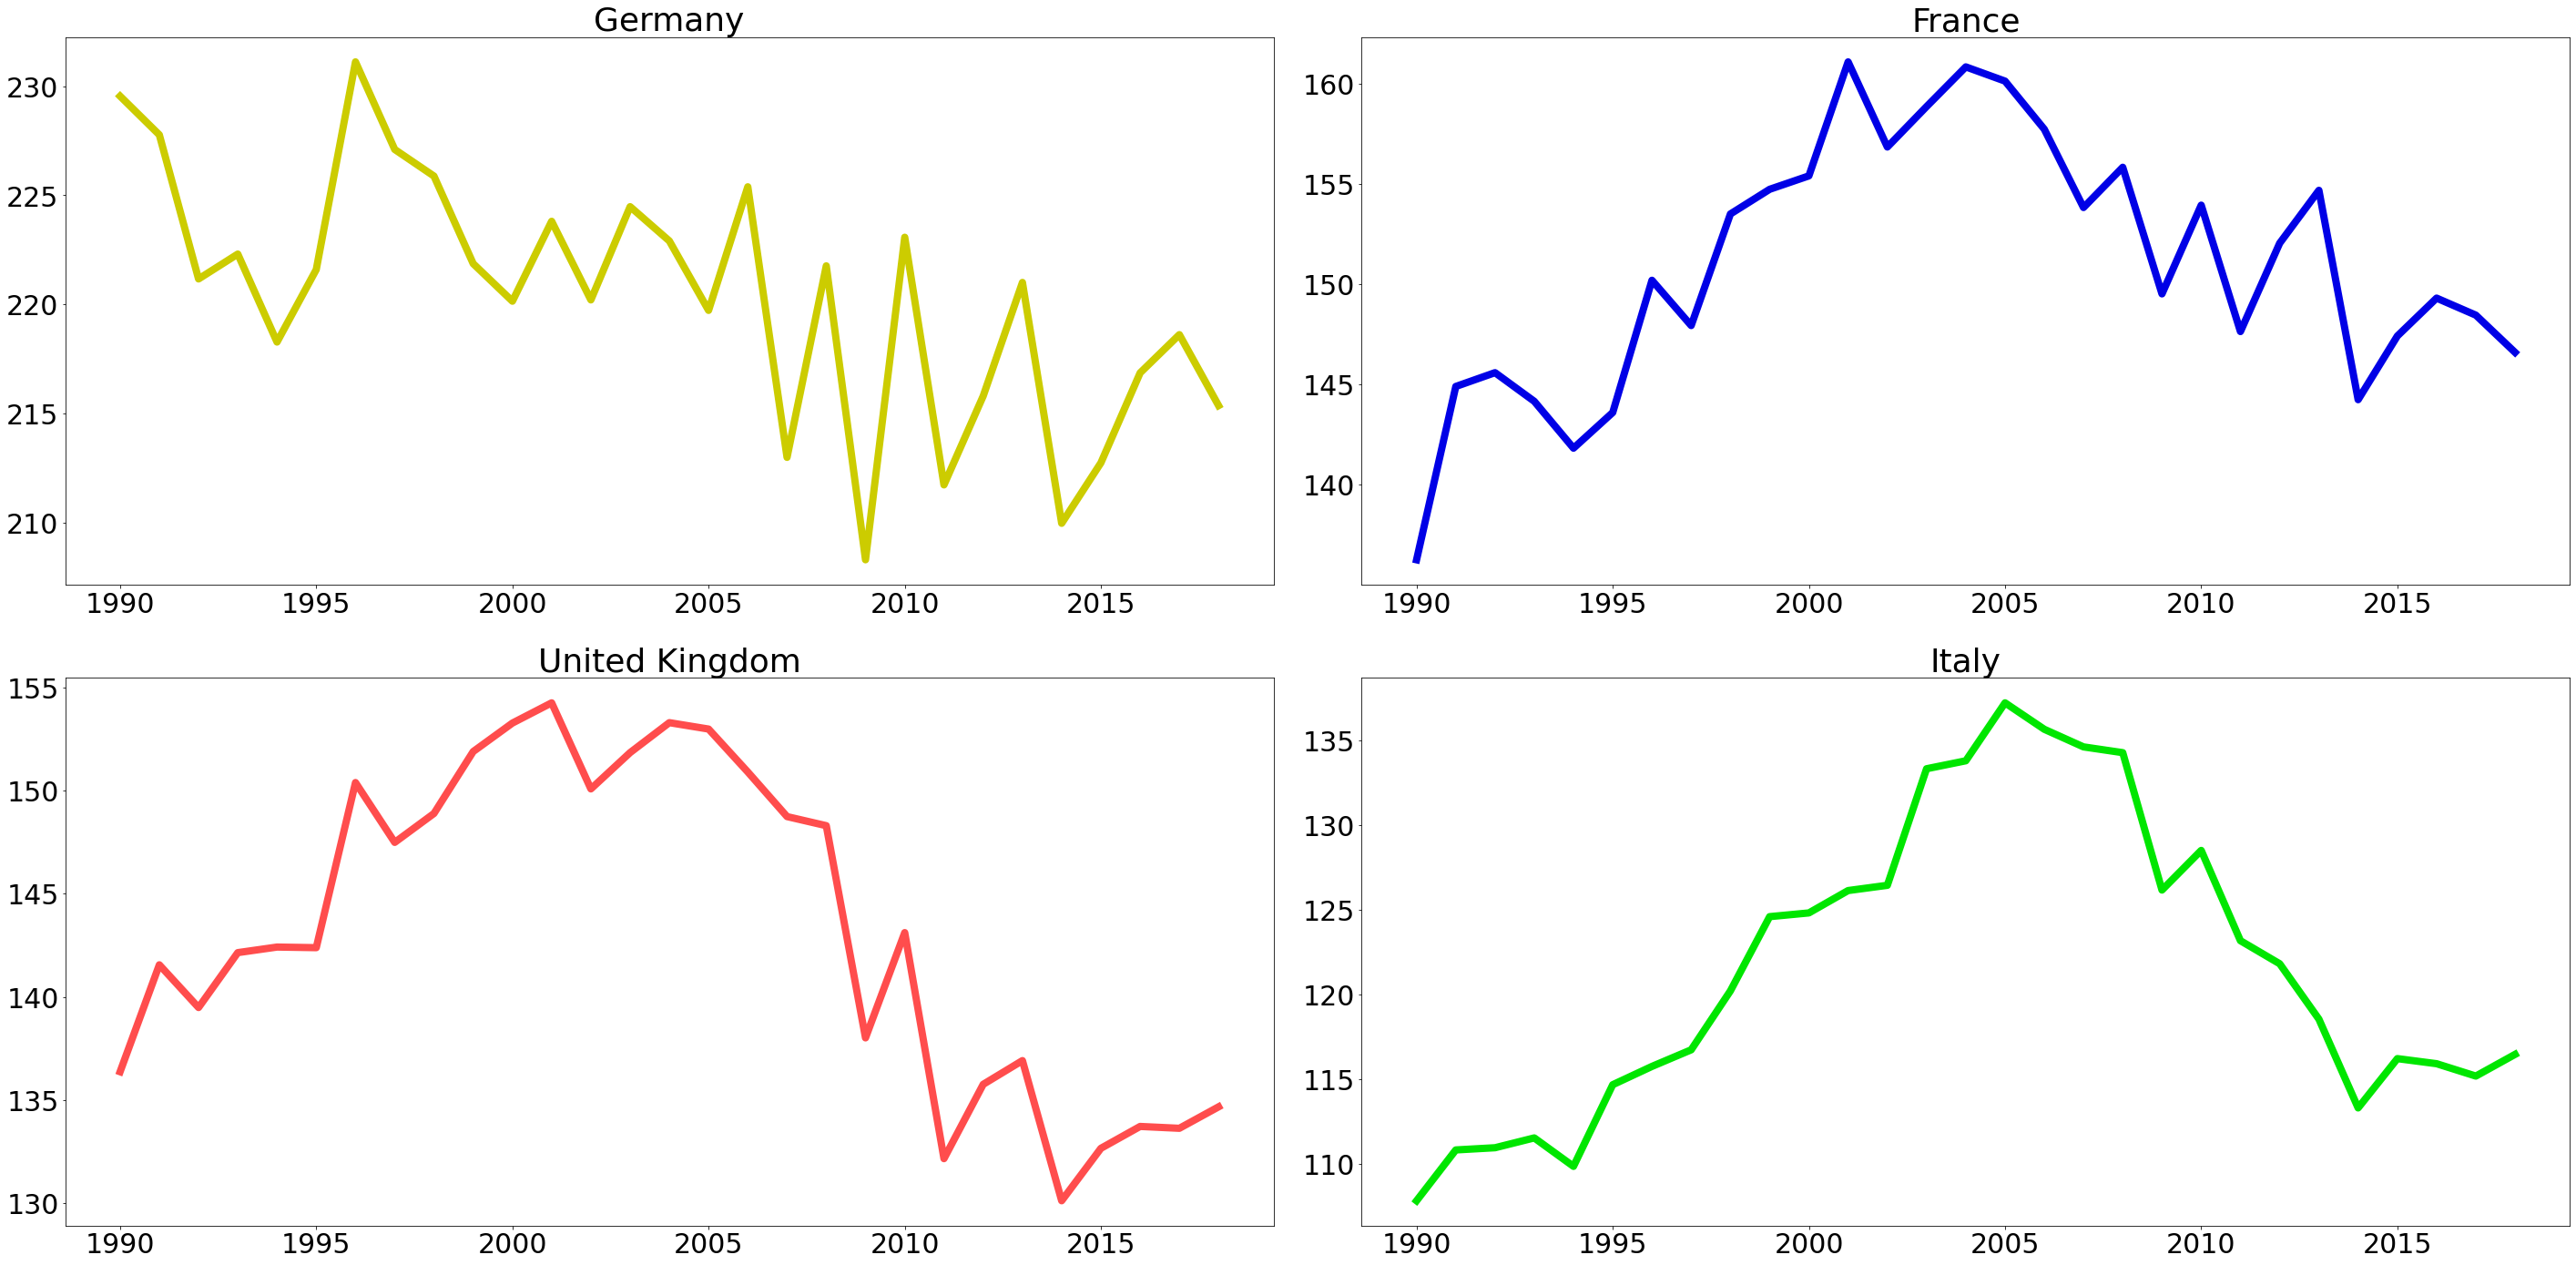

In [7]:
plt.rcParams.update({'font.size': 30, 'text.color': 'black'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40,20))
df_float3 = df.astype(float)
for index, country in enumerate(focus_countries):
    df_float3[country[0]].plot(kind="line", ax=axes[int(index / 2)][int(index % 2)], title=country[1], linewidth=8, color=country[2])

plt.tight_layout()
plt.show()
plt.close()

The chart above, if we select Germany, France, United Kingdom and Italy, shows some information that are worth further investigation. As we can see Germany has shown a downtrend in energy consumption from at least around 1996. In France, Italy and UK energy consumption has been increasing during 90s and the beginning of the first decade of the 21st century reaching its peak around 2002-2004 for UK and around 2005 for France and Italy. From then we can see a clear downtrend in energy consumption.

What could be the reason for that? It requires farther research. What comes to my mind what potential causes for that could be are:
* Innovations with Germany being one of the most innovative countries in Europe which makes production and living technologically more cost-efficient
* Production offshoring of high-energy consuming manufacturing to other countries 

However, these are only hypotheses.

For comparing energy consumption of countries taking into account their population, let's import population numbers from Eurostat

Source of data: [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/demo_pjan/default/table?lang=en)

**Population**

Population dataset from Eurostat. Eurostat aims at collecting from the EU Member States data on population on 1 January. The recommended definition is the 'usually resident population' and represents the number of inhabitants of a given area on 1 January of the year in question (or, in some cases, on 31st December of the previous year). However, the population transmitted by the countries can also be either based on data from the most recent census adjusted by the components of population change produced since the last census, either based on population registers.

In [8]:
df_population = pd.read_csv('population.tsv', sep='\t')

In [9]:
# Cleaning the data

df_population.rename(columns = {list(df_population)[0]: "Country"}, inplace=True)
df_population['Country'] = df_population['Country'].map(lambda location: location.rsplit(",").pop())
df_population.rename(columns=lambda name: name.replace(' ', ''), inplace=True)
df_population = df_population.set_index(df_population.Country)
df_population.drop(df_population.columns[[0]], axis=1, inplace=True)
df_population = df_population.transpose()
df_population.drop(['DE_TOT', 'EA18', 'EA19', 'EE', 'EEA30_2007', 'EEA31', 'EFTA', 'EU27_2007', 'EU27_2020', 'EU28'], axis=1, inplace=True)
df_population.replace(' b', '', regex=True, inplace=True)
df_population.replace(' p', '', regex=True, inplace=True)
df_population.replace(' e', '', regex=True, inplace=True)
df_population.replace({": ": np.nan, ":": np.nan}, inplace=True)
df_p_float = df_population.astype(float)
pd.options.display.float_format = "{:,.0f}".format
df_p_float

Country,AD,AL,AM,AT,AZ,BA,BE,BG,BY,CH,...,RS,RU,SE,SI,SK,SM,TR,UA,UK,XK
2010,"84,082","2,918,674","3,249,482","8,351,643","8,997,586","3,844,046","10,839,905","7,421,766","9,480,178","7,785,806",...,"7,306,677","141,914,509","9,340,682","2,046,976","5,390,410",nan,"72,561,312","45,782,592","62,510,197","2,208,107"
2011,"78,115","2,907,361","3,262,650","8,375,164","9,111,078","3,843,183","11,000,638","7,369,431","9,481,193","7,870,134",...,"7,251,549","142,856,536","9,415,570","2,050,189","5,392,446","31,863","73,722,988","45,598,179","63,022,532","1,794,180"
2012,"78,115","2,903,008","3,274,285","8,408,121","9,235,085","3,839,265","11,075,889","7,327,224","9,465,150","7,954,662",...,"7,216,649","143,056,383","9,482,855","2,055,496","5,404,322","33,376","74,724,269","45,453,282","63,495,088",nan
2013,"76,246","2,897,770",nan,"8,451,860","9,356,483",nan,"11,137,974","7,284,552","9,463,840","8,039,060",...,"7,181,505",nan,"9,555,893","2,058,821","5,410,836","33,562","75,627,384","45,372,692","63,905,342",nan
2014,nan,"2,892,394",nan,"8,507,786","9,477,119",nan,"11,180,840","7,245,677","9,468,154","8,139,631",...,"7,146,759","143,666,931","9,644,864","2,061,085","5,415,949",nan,"76,667,864","45,245,894","64,351,203",nan
2015,nan,"2,885,796","3,010,598","8,584,926","9,593,038",nan,"11,237,274","7,202,198","9,480,868","8,237,666",...,"7,114,393",nan,"9,747,355","2,062,874","5,421,349",nan,"77,695,904","42,759,661","64,853,393",nan
2016,nan,"2,875,592","2,998,577","8,700,471","9,705,643",nan,"11,311,117","7,153,784","9,498,364","8,327,126",...,"7,076,372",nan,"9,851,017","2,064,188","5,426,252",nan,"78,741,053","42,590,879","65,379,044","1,771,604"
2017,nan,"2,876,591","2,986,151","8,772,865","9,809,981",nan,"11,351,727","7,101,859","9,504,704","8,419,550",...,"7,040,272",nan,"9,995,153","2,065,895","5,435,343",nan,"79,814,871","42,414,905","65,844,142","1,783,531"
2018,nan,"2,870,324","2,972,732","8,822,267","9,898,085",nan,"11,398,589","7,050,034","9,491,823","8,484,130",...,"7,001,444",nan,"10,120,242","2,066,880","5,443,120","34,453","80,810,525","42,216,766","66,273,576","1,798,506"
2019,"76,177","2,862,427","2,965,269","8,858,775","9,981,457",nan,"11,455,519","7,000,039","9,475,174","8,544,527",...,"6,963,764",nan,"10,230,185","2,080,908","5,450,421",nan,"82,003,882","41,983,564","66,647,112","1,795,666"


In [10]:
pd.options.display.float_format = "{:,.0f}".format

df_en_pop = df_float.loc[year_to_get].rename("Energy consumption").to_frame().join(df_p_float.loc[year_to_get].rename("Population"))
df_en_pop.dropna(inplace=True)
df_en_pop

,Energy consumption,Population
Country,,
AL,2,"2,876,591"
AT,29,"8,772,865"
BE,36,"11,351,727"
BG,10,"7,101,859"
CY,2,"854,802"
CZ,26,"10,578,820"
DE,219,"82,521,653"
DK,15,"5,748,769"
EL,17,"10,768,193"


In [11]:
df_en_pop["Population"] = df_en_pop["Population"].apply(lambda x: x/1000000)

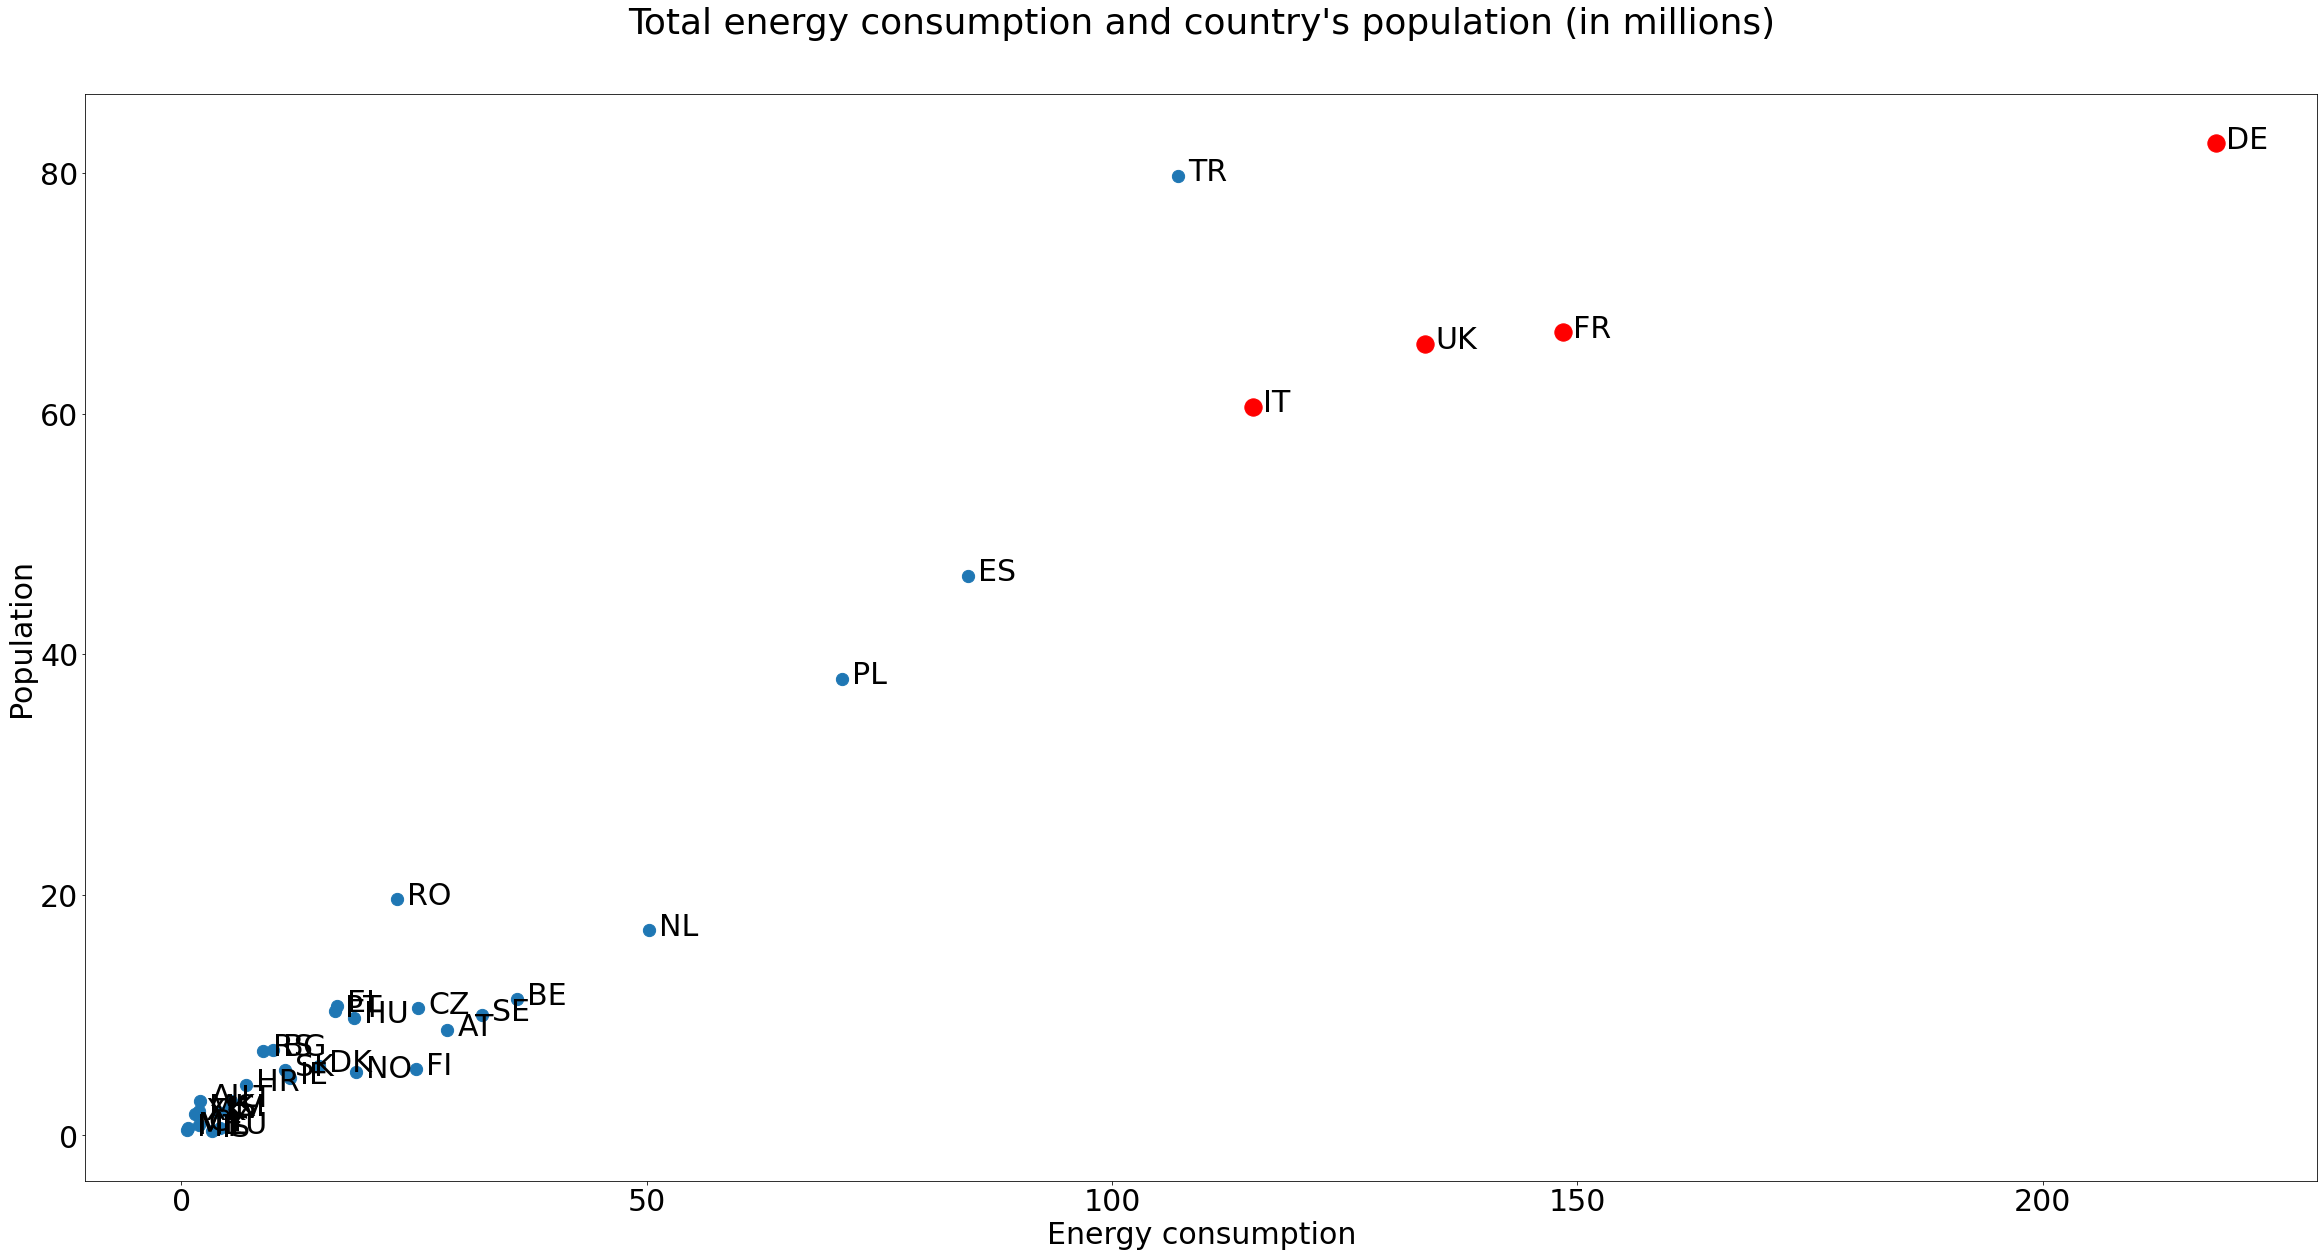

In [12]:
fig, axes = plt.subplots(figsize=(40,20))

df_en_pop.plot(kind="scatter", x="Energy consumption", y="Population", ax=axes, s=150)
axes.ticklabel_format(useOffset=False, style='plain', axis='y')
for index, item in df_en_pop.iterrows():
    axes.annotate(index, item, xytext=(10,-5), textcoords='offset points')
    
for country in focus_countries:
    axes.scatter(x=df_en_pop["Energy consumption"][country[0]], y=df_en_pop["Population"][country[0]], c='r', s=300)

axes.set_title("Total energy consumption and country's population (in millions)", pad=60)    

plt.show()
plt.close()

Unsurprisingly, we can visibly see a positive correlation between countries' energy consumption and population. The countries selected for investigations are signed with red dots instead of blue ones.

What can bring us some new information is the ratio of energy consumption to population.

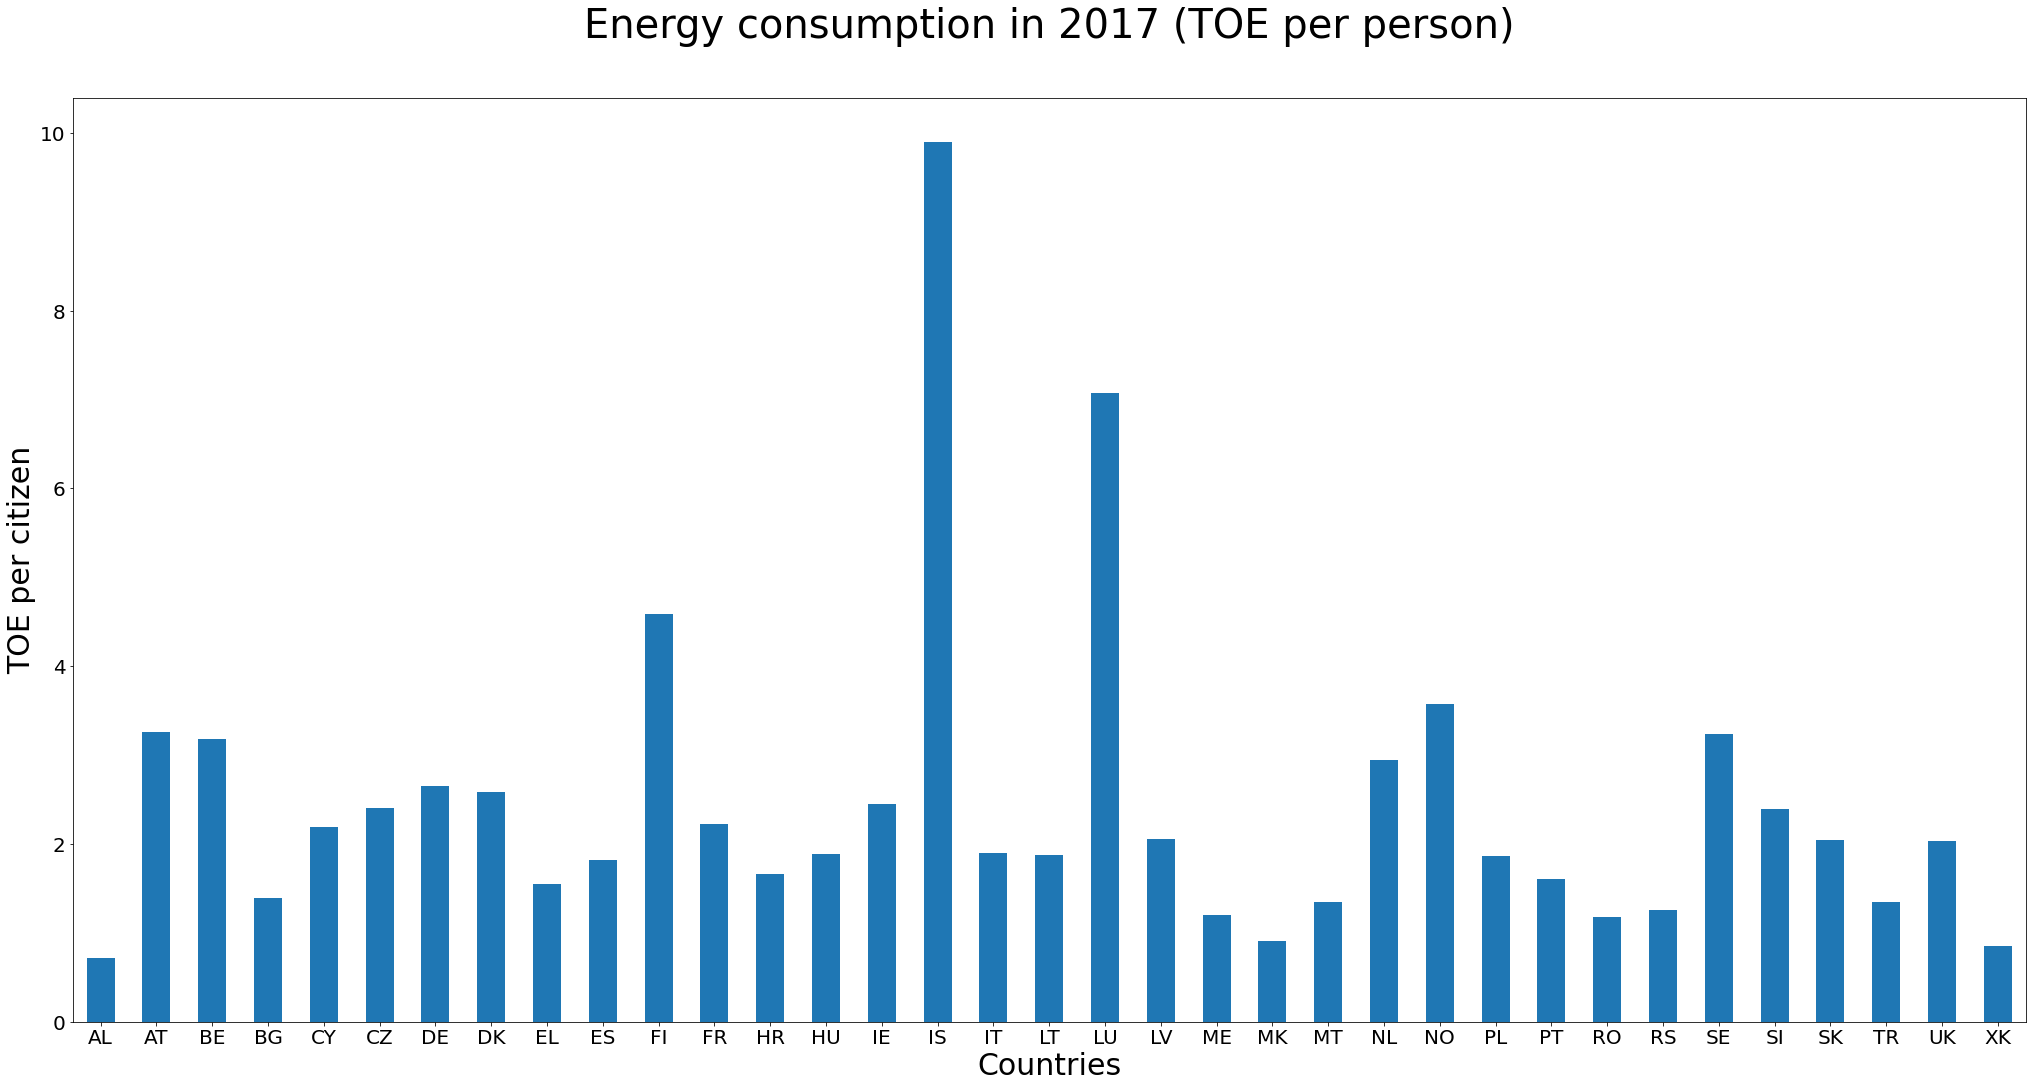

In [13]:
pd.options.display.float_format = "{:,.2f}".format
s_en_pop = df_float.loc[year_to_get].divide(df_p_float.loc[year_to_get] / 1000000, fill_value=np.nan)
s_en_pop.dropna(inplace=True)

fig, axes = plt.subplots()
s_en_pop.plot(rot=0, kind='bar', figsize=(35,17), fontsize=20, ax=axes)
axes.set_title('Energy consumption in {} (TOE per person)'.format(year_to_get), pad=60)
axes.title.set_size(40)
axes.set_xlabel("Countries", fontsize=30)
axes.set_ylabel("TOE per citizen", fontsize=30)
plt.show()
plt.close()

Interestingly Germany, France, Italy and United Kingdom are "lost in the crowd" in this chart. The countries with top three values are Iceland, Luxembourg and Finland. Higher numbers of other Scandinavian (Norway and Sweden) and Beneluxian (Belgium and Netherlands) indicates that probably it is a regional specificity.

In [14]:
pd.options.display.float_format = "{:,.2f}".format

df_en_pop_pc = df_float.loc[year_to_get].rename("Energy consumption").to_frame().join(s_en_pop.rename("Energy consumption per person"))
df_en_pop_pc.dropna(inplace=True)
df_en_pop_pc

,Energy consumption,Energy consumption per person
Country,,
AL,2.08,0.72
AT,28.61,3.26
BE,36.10,3.18
BG,9.89,1.39
CY,1.87,2.19
CZ,25.50,2.41
DE,218.62,2.65
DK,14.84,2.58
EL,16.75,1.56
